In [116]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import beta, expon, poisson 

In [45]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html

In [211]:
def show_chart(x, size, sn, a_lim, prob_limit, actual_prob, title):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    N, bins, patches = ax1.hist(x, bins=50, label='data')
#     print(N, bins)
    # ax1.hist(x[x>a_lim], bins=50, label='data')
    max_hist = np.max(N)
    
    for _b, _p in zip(bins, patches):
        if _b >=a_lim:
            _p.set_color('orange')

    ax1.vlines(sn  , 0, max_hist, colors='black', linestyles='dashed', label=r'$E[x]$')
    ax1.vlines(a_lim, 0, max_hist, colors='red', label=r'$\alpha$ limit')
    ax1.legend(loc='best')
    ax1.set_title(title)

    if prob_limit >1:
        ax2.hlines(0, 0, prob_limit,  color='black')
    else:
        ax2.hlines(0, 0, 1,  color='black')
    ax2.vlines(1, -0.02, 0.02,  color='black')
    ax2.vlines(0, -0.02, 0.02,  color='black')


    bar_cntr =ax2.bar(prob_limit,       0.25, width=0.01, color='red', label='M.I. Limit')
    _blue  = bar_cntr[-1].get_facecolor()
    ax2.scatter(prob_limit, 0, color =_blue)

    bar_cntr = ax2.bar(actual_prob, 0.15, width=0.01, color='orange', label='actual')
    _blue  = bar_cntr[-1].get_facecolor()
    ax2.scatter(actual_prob, 0, color =_blue)

    bbox={'facecolor':'white','alpha':1,'edgecolor':'none','pad':1}
    
    ax2.text(prob_limit, 0.3, str(prob_limit)[:5], bbox=dict(fill=False, edgecolor='red', linewidth=0), ha='center', va='center')
    ax2.text(actual_prob, 0.2, str(actual_prob)[:5], bbox=dict(fill=False, edgecolor='red', linewidth=0), ha='center', va='center')
    ax2.text(-0.015, -0.1, '0', bbox=dict(fill=False, edgecolor='red', linewidth=0))
    ax2.text(0.98, -0.1, '1', bbox=dict(fill=False, edgecolor='red', linewidth=0))

    ax2.set_title('Boundary comparison')
    ax2.get_yaxis().set_visible(False)
    ax2.get_xaxis().set_visible(False)
    ax2.set_ylim(-1,1)
    ax2.legend(loc='best')
    # plt.title('asd')
    plt.show()

In [ ]:
def show_MI_beta(a,b,size, a_lim):

    # data
    x = beta.rvs(a, b, size=(size,))
    
    mean, var, skew, kurt = beta.stats(a,b , moments='mvsk')
    

    # a > 0
    prob_limit = mean/a_lim

    # actual probability
    actual_prob = np.sum(x>a_lim)/size
    title = f'beta distribution a= {a} b={b}'
    show_chart(x, size, mean, a_lim, prob_limit, actual_prob, title)

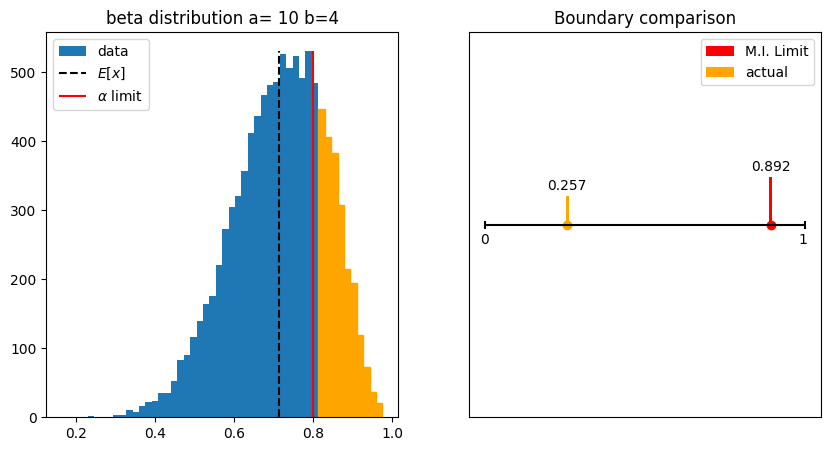

In [193]:
show_MI_beta(a = 10,b =4,size = 10000,a_lim = 0.8)

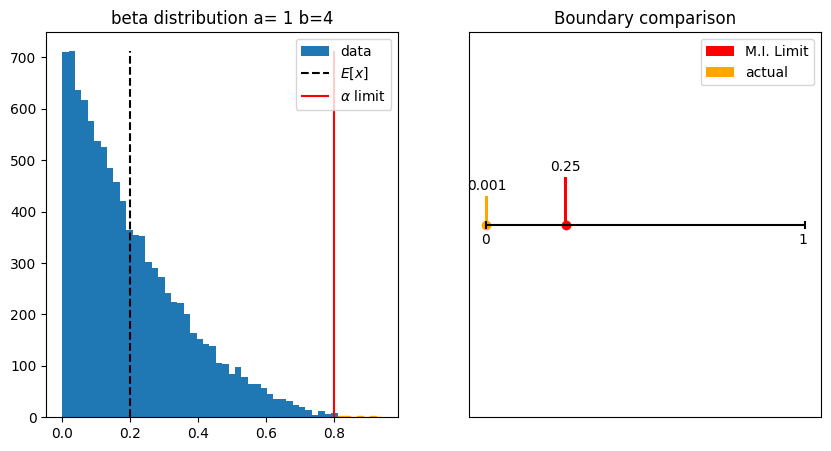

In [194]:
show_MI_beta(a = 1,b =4,size = 10000,a_lim = 0.8)

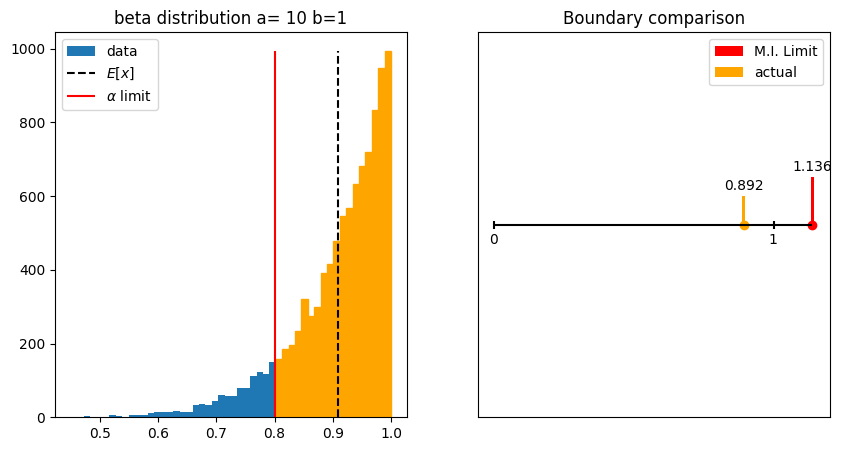

In [195]:
show_MI_beta(a = 10,b =1,size = 10000, a_lim = 0.8)

In [201]:
def show_MI_exp(p,size, a_lim):
    # data
    x = expon.rvs(scale=p,size=(size,))
    mean, var, skew, kurt = expon.stats(p, moments='mvsk')
    print('m',mean,'; var=', var, '; skew=', skew,'; kurt=', kurt)

    # a > 0
    prob_limit = mean/a_lim

    # actual probability
    actual_prob = np.sum(x>a_lim)/size
    title = f'Exp distribution $\lambda$={p}'
    show_chart(x, size, mean, a_lim, prob_limit, actual_prob, title)

m 3.0 ; var= 1.0 ; skew= 2.0 ; kurt= 6.0


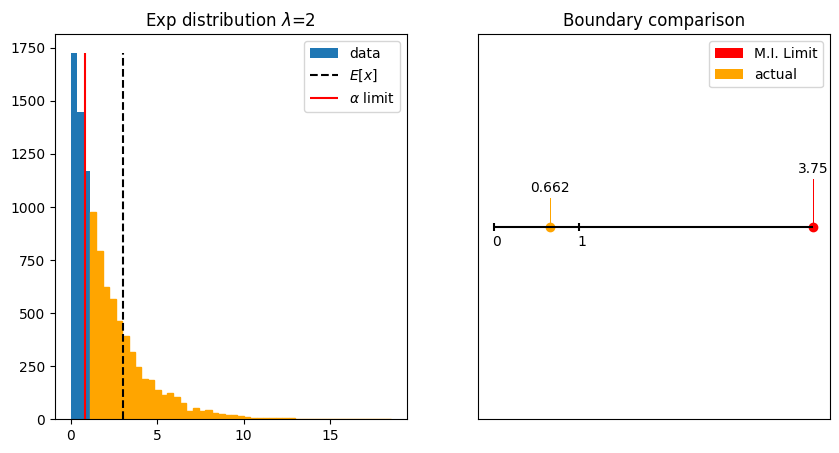

In [202]:
show_MI_exp(2,size = 10000, a_lim = 0.8)

m 2.0 ; var= 1.0 ; skew= 2.0 ; kurt= 6.0


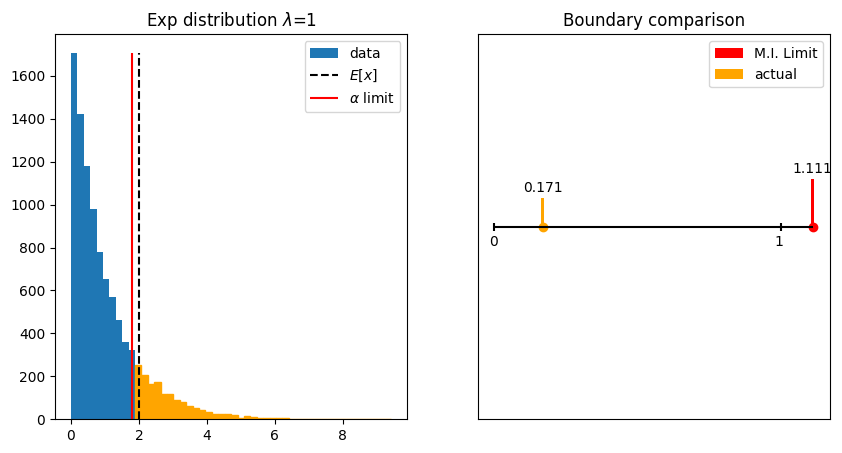

In [217]:
show_MI_exp(1,size = 10000, a_lim = 1.8)

m 3.0 ; var= 1.0 ; skew= 2.0 ; kurt= 6.0


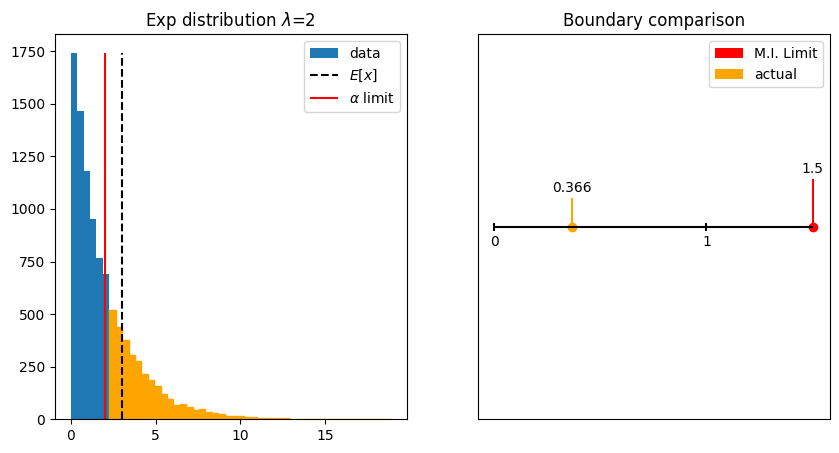

In [216]:
show_MI_exp(2,size = 10000, a_lim = 2)

m 11.0 ; var= 1.0 ; skew= 2.0 ; kurt= 6.0


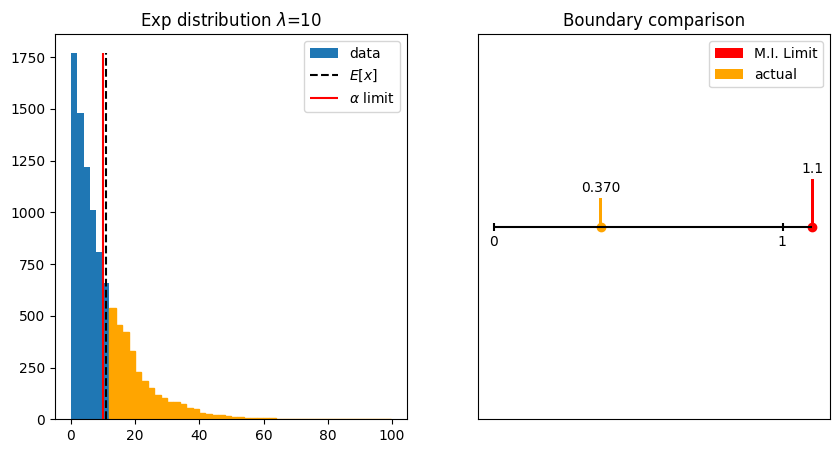

In [215]:
show_MI_exp(10,size = 10000, a_lim = 10)

m 11.0 ; var= 1.0 ; skew= 2.0 ; kurt= 6.0


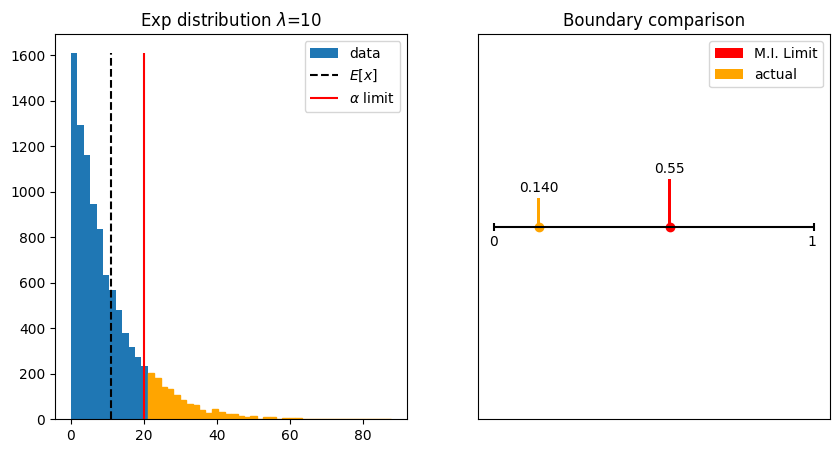

In [213]:
show_MI_exp(10,size = 10000, a_lim = 20)

m 11.0 ; var= 1.0 ; skew= 2.0 ; kurt= 6.0


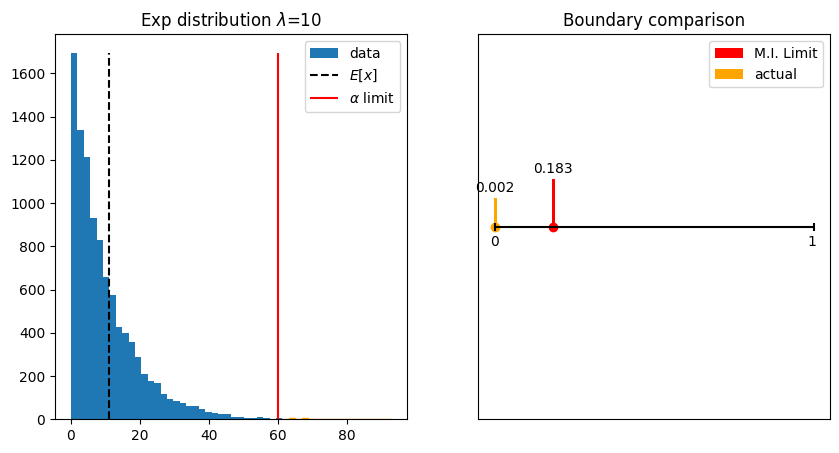

In [214]:
show_MI_exp(10,size = 10000, a_lim = 60)

In [206]:
def show_MI_poisson(p,size, a_lim):

    # data
    x = poisson.rvs(p,size=(size,))
    mean, var, skew, kurt = poisson.stats(p, moments='mvsk')
    print('m',mean,'; var=', var, '; skew=', skew,'; kurt=', kurt)
    # a > 0
    prob_limit = mean/a_lim

    # actual probability
    actual_prob = np.sum(x>a_lim)/size
    title = f'Poisson distribution $\mu$={p}'
    show_chart(x, size, mean, a_lim, prob_limit, actual_prob, title)

    

m 0.1 ; var= 0.1 ; skew= 3.1622776601683795 ; kurt= 10.0


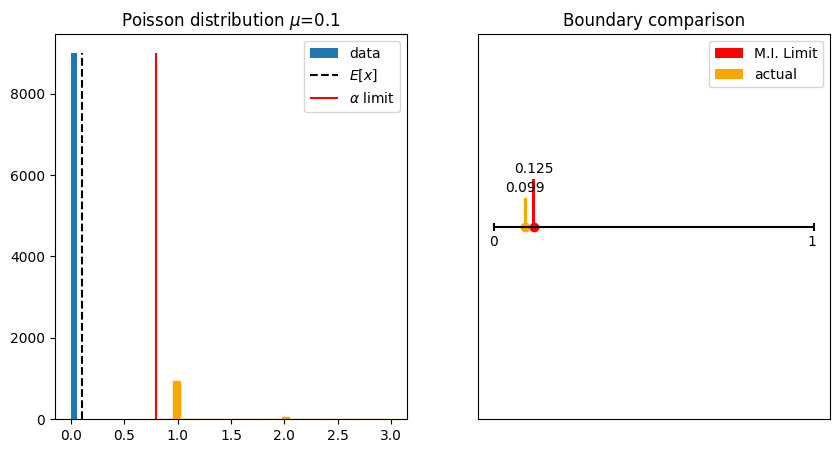

In [207]:
show_MI_poisson(0.1,size = 10000, a_lim = 0.8)

m 1.0 ; var= 1.0 ; skew= 1.0 ; kurt= 1.0


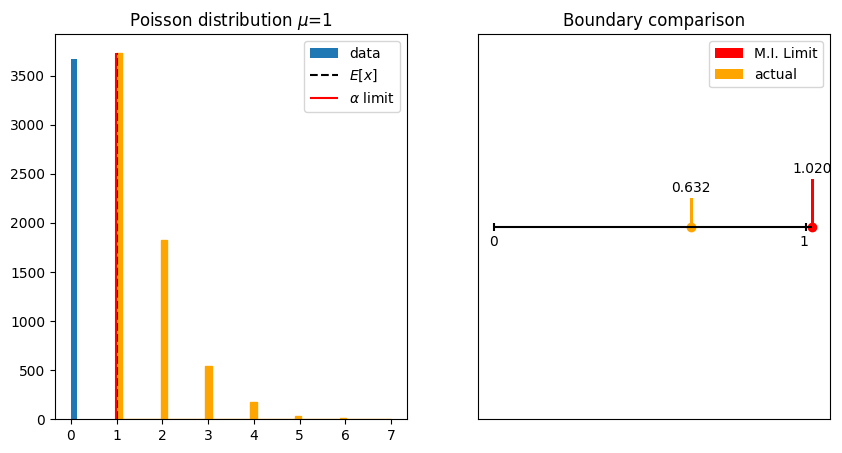

In [220]:
show_MI_poisson(1,size = 10000, a_lim = 0.98)

m 2.0 ; var= 2.0 ; skew= 0.7071067811865476 ; kurt= 0.5


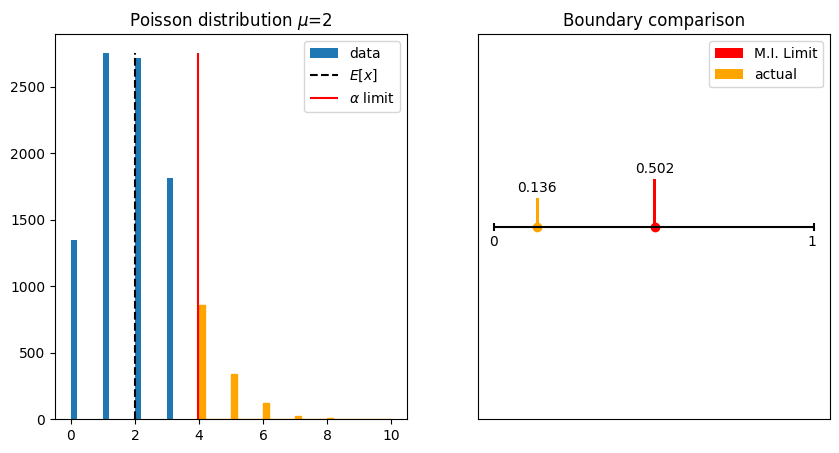

In [221]:
show_MI_poisson(2,size = 10000, a_lim = 3.98)

m 10.0 ; var= 10.0 ; skew= 0.31622776601683794 ; kurt= 0.1


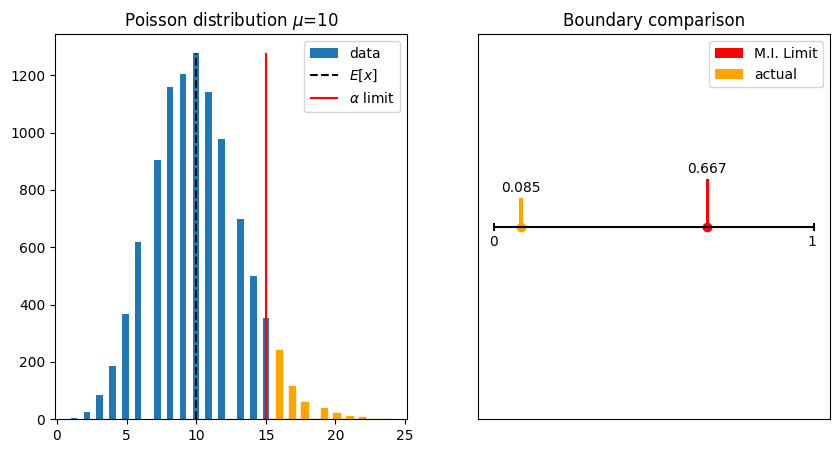

In [222]:
show_MI_poisson(10,size = 10000, a_lim =14.98)